<a href="https://colab.research.google.com/github/deniskapel/Compling_course/blob/master/KD_hw_6_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BigARTM

## installing BigARTM and pymorphy

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 16618 (delta 6), reused 6 (delta 0), pack-reused 16591
Receiving objects: 100% (16618/16618), 17.21 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (11613/11613), done.


In [4]:
cd bigartm

/content/bigartm


In [5]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


Вернемся в изначальную папку.

In [10]:
cd ../.. 

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 8.2MB 5.3MB/s 
     |████████████████████████████████| 378kB 47.2MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=869285 sha256=528b307509cd7ee4ca11a3991a06d9eee3952605dae4f21b8c375c067b226d73
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


## Load modules and data

In [12]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import string
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stops = set(stopwords.words('russian'))

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/usr/local/lib/python3.6/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/wiki_data.txt.zip
!unzip wiki_data.txt.zip

--2021-01-26 22:51:13--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/wiki_data.txt.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/wiki_data.txt.zip [following]
--2021-01-26 22:51:13--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/wiki_data.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18709143 (18M) [application/zip]
Saving to: ‘wiki_data.txt.zip’

wiki_data.txt.zip   100%[===================>]  17.84M  41.2MB/s    in 0.4s    

2021-01-26 22:51:14 (41.2 MB/s) - ‘wiki_data.txt.zi

## Prerocessing texts

In [89]:
class TextNormalizer():
    
    # Class for fast text-normalization
        
    def opt_normalize(self, texts, top=None) -> list:
        
        texts = self.tokenize_texts(texts)
        
        uniq = Counter()
        [uniq.update(text) for text in texts]

        norm_uniq = { # build cache
            word:morph.parse(
                word.replace(':', '')
            )[0].normal_form for word, _ in uniq.most_common(top)}

        norm_texts = self.normalize_texts(texts, norm_uniq)
        
        return norm_texts
    
    def tokenize_texts(self, texts):
        """ a text tokenizer for a list of texts """
        return ([self.tokenize(text.lower()) for text in texts])


    def tokenize(self, text) -> list:
        """ a single text tokenizer """
        punct = string.punctuation + "«»—…–“”" # hash is not caught somehow
        words = [word.strip(punct).replace("#", "") for word in text.split()]
        words = [word for word in words if word]

        return words
    
    def normalize_texts(self, texts, norm_uniq) -> list:
        """ returns lemmas and removes stopwords and punctuation """
        norm_texts = []
        for text in texts:
            # lemmas from cashe
            norm_words = [norm_uniq.get(word) for word in text]
            #remove punctuation
            
            norm_words = [word for word in norm_words if (
                word) and (word not in stops)]
            norm_texts.append(norm_words)

        return norm_texts

In [90]:
texts = open('wiki_data.txt').read().splitlines()

In [91]:
%%time
texts = TextNormalizer().opt_normalize(texts, 30000)

CPU times: user 7.99 s, sys: 245 ms, total: 8.24 s
Wall time: 8.25 s


build ngrams

In [92]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.5,
                           common_terms=set(stopwords.words('russian')))

p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

In [97]:
ngrammed_texts[13]

['уезд',
 'нижегородский',
 'уезд',
 'административно-территориальный_единица',
 'состав',
 'нижегородский_губерния',
 'российский_империя',
 'рсфср',
 'существовать',
 'год',
 'уездный_город',
 'уезд',
 'состав',
 'нижегородский',
 'наместничество',
 'образовать',
 '1779',
 'год',
 'ход',
 'административный',
 'реформа',
 'екатерина_ii',
 '1796',
 'год',
 'состав',
 'нижегородский_губернии.ть',
 '1923',
 'год',
 'уезд',
 'упразднить',
 'территория',
 'разделить',
 'данные_перепись',
 '1897',
 'год',
 'уезд',
 'проживать',
 '141',
 'чел',
 'число',
 'русский',
 'уездный_город',
 'человек.ть',
 '1913',
 'год',
 'уезд',
 '29',
 'волость']

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

In [98]:
f = open('wiki_texts.vw', 'w')

for i, text in enumerate(ngrammed_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [99]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [100]:
batch_vectorizer = artm.BatchVectorizer(
    data_path='wiki_texts.vw',  # название файла
    data_format='vowpal_wabbit', # формат файла, у нас vw
    target_folder='batches', # название папки в которую положаться батчи
    batch_size=2000) # размер батча, подбирайте под свою память

Уже созданные батчи можно заново загружать

In [101]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [102]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [105]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000,
                  max_dictionary_size=2000)

artm.Dictionary(name=25853bd2-9873-4ddc-b0a6-809cd0424f25, num_entries=1998)

**Словарь отредактирован руками** - минус:
даты
сокращения
неудачные биграммы
~ минус 200 слов

In [106]:
dictionary.save_text('dict.txt')

In [107]:
dictionary = artm.Dictionary()
dictionary.load_text('dict.txt')

## Create models

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

### Model 1

In [132]:
model_artm_lg = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.1, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.1, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [133]:
# initialize model
model_artm_lg.initialize(dictionary=dictionary)

In [134]:
# add metrics
model_artm_lg.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm_lg.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm_lg.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm_lg.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm_lg.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Train model

In [135]:
model_artm_lg.num_document_passes = 2
model_artm_lg.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.007 (ARTM)
Kernel purity: 0.005 (ARTM)
Perplexity: 38.910 (ARTM)


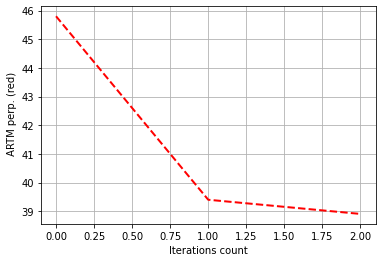

In [136]:
print_measures(model_artm_lg)

Add Regularizer

In [137]:
model_artm_lg.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm_lg.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [138]:
model_artm_lg.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

In [140]:
# step by step increase resulizers' parameters
phi_tau = model_artm_lg.regularizers['SparsePhi'].tau
theta_tau = model_artm_lg.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm_lg.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm_lg.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm_lg.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.789 ARTM)
Sparsity Theta: 0.826 (ARTM)
Kernel contrast: 0.494 (ARTM)
Kernel purity: 0.647 (ARTM)
Perplexity: 19.276 (ARTM)


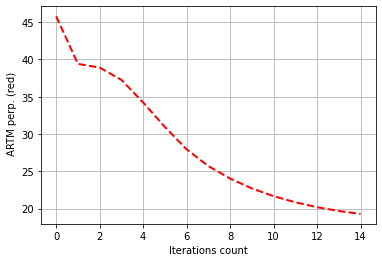

In [142]:
# посмотрим на качество
print_measures(model_artm_lg)

Results of this model are not even close to recommeded perplexity, but some topics looks promissing

**Some of the well-shaped topics by model 1:**

topic_4: немецкий операция подразделение соединение сопротивление берлин германский тяжёлый солдат немец

topic_8: театр искусство художник художественный театральный мастер мастерская творческий творчество учиться

topic_24: улица центральный площадь дом ленин областной сторона центр располагаться параллельно

In [ ]:
# check first 30 topics
for topic_name in model_artm_lg.topic_names[:30]:
    print(topic_name + ': ')
    try:
        for x in model_artm_lg.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # some topics might be empty if overplayed with parameters
        continue

### model 2

In [156]:
model_artm_mid = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(125)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 125)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.02, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 125)])
                                    ]
                        )

In [157]:
# initialize model
model_artm_mid.initialize(dictionary=dictionary)

In [158]:
# add metrics
model_artm_mid.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm_mid.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm_mid.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm_mid.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm_mid.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

In [159]:
model_artm_mid.num_document_passes = 2
model_artm_mid.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.020 (ARTM)
Kernel purity: 0.007 (ARTM)
Perplexity: 38.863 (ARTM)


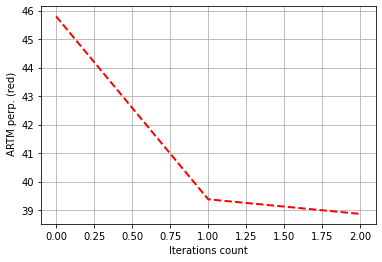

In [160]:
print_measures(model_artm_mid)

Add Regularizer

In [ ]:
model_artm_mid.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

In [162]:
model_artm_mid.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

In [163]:
# step by step increase resulizers' parameters
phi_tau = model_artm_mid.regularizers['SparsePhi'].tau
theta_tau = model_artm_mid.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm_mid.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm_mid.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm_mid.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.723 ARTM)
Sparsity Theta: 0.724 (ARTM)
Kernel contrast: 0.411 (ARTM)
Kernel purity: 0.640 (ARTM)
Perplexity: 21.424 (ARTM)


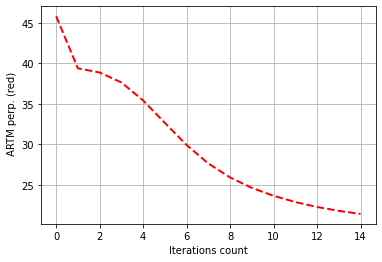

In [164]:
# посмотрим на качество
print_measures(model_artm_mid)

Repeat with more passes

In [166]:
model_artm_mid.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=3)

Sparsity Phi: 0.802 ARTM)
Sparsity Theta: 0.750 (ARTM)
Kernel contrast: 0.471 (ARTM)
Kernel purity: 0.732 (ARTM)
Perplexity: 20.705 (ARTM)


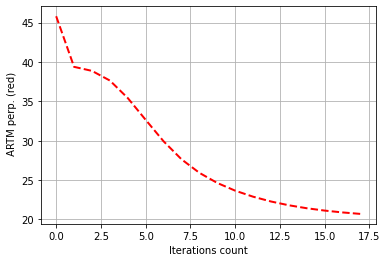

In [167]:
print_measures(model_artm_mid)

Again, not even close to 200-1000

**Some of the well-shaped topics:**

topic_14: решение объект задача особый сохранение охрана осуществлять восстановление наименование формирование

topic_22: сын король отец мать дочь королевство королевский карл скончаться смерть

topic_15: земля экспедиция обнаружить оказаться владение достигнуть вероятно прийтись возвращение попытаться

In [ ]:
# check first 30 topics
for topic_name in model_artm_mid.topic_names[:30]:
    print(topic_name + ': ')
    try:
        for x in model_artm_mid.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # some topics might be empty if overplayed with parameters
        continue

### model 3

In [183]:
model_artm_sm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(75)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 75)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 75)])
                                    ]
                        )

In [184]:
# initialize model
model_artm_sm.initialize(dictionary=dictionary)

In [185]:
# add metrics
model_artm_sm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm_sm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm_sm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm_sm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm_sm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Train model

In [186]:
# number of passes has a big impact on perplexity:
# larger values can mess with the model as well
model_artm_sm.num_document_passes = 3
model_artm_sm.fit_offline(batch_vectorizer=batch_vectorizer,
                          num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.063 (ARTM)
Kernel purity: 0.022 (ARTM)
Perplexity: 38.047 (ARTM)


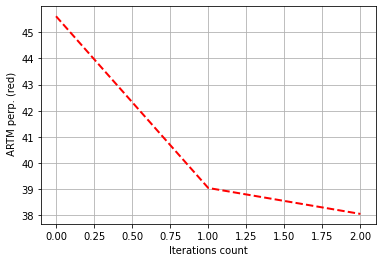

In [187]:
print_measures(model_artm_sm)

Add Regularizer

In [188]:
model_artm_sm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(0, 75)],
                                                            ))
model_artm_sm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(0, 75)]))

In [189]:
model_artm_sm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

In [190]:
# step by step increase resulizers' parameters
phi_tau = model_artm_sm.regularizers['SparsePhi'].tau
theta_tau = model_artm_sm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm_sm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm_sm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm_sm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.634 ARTM)
Sparsity Theta: 0.756 (ARTM)
Kernel contrast: 0.376 (ARTM)
Kernel purity: 0.665 (ARTM)
Perplexity: 22.310 (ARTM)


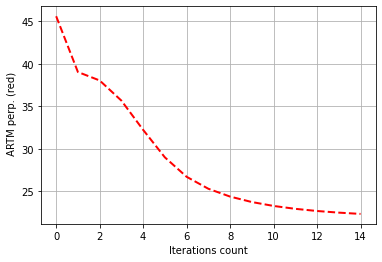

In [191]:
# посмотрим на качество
print_measures(model_artm_sm)

All models appear to have somewhat similar perplexity

**Some of the well-shaped topics by model 3:**

topic_25: сезон чемпионат выступать играть провести карьера лига перейти чемпионат_мир матч

topic_15: земля граф экспедиция владение графство франция англия королевский роберт уильям

topic_2: император н_э источник царь римский битва рим империя греческий известно

In [ ]:
# check first 30 topics
for topic_name in model_artm_sm.topic_names[:30]:
    print(topic_name + ': ')
    try:
        for x in model_artm_sm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # some topics might be empty if overplayed with parameters
        continue

## Conclusion

All three models's performance was relatively similar, and for now it is hard to define which parameters has larger influence it.

The most noticable impact was observed when number of passes, both document and collection, was changed.